## Observations and Insights 

In [56]:
%matplotlib notebook
# Dependencies and Setup
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()


# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, how='inner', on='Mouse ID')


# Display the data table for preview
mouse_study = mouse_study[["Mouse ID","Timepoint","Tumor Volume (mm3)", "Metastatic Sites",
                           "Drug Regimen","Sex","Age_months","Weight (g)" ]]

mouse_study.set_index(["Mouse ID","Timepoint"])

mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [58]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [59]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study[mouse_study.duplicated()]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
909,g989,0,45.0,0,Propriva,Female,21,26


In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
dups = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study = mouse_study.loc[mouse_study["Mouse ID"] != "g989"]
mouse_study.set_index(["Mouse ID","Timepoint"])
cleaned_mouse_study = mouse_study
cleaned_mouse_study.set_index(["Sex","Mouse ID"])
mouse_study.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [62]:
# Checking the number of mice in the clean DataFrame. 
len(mouse_study["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_reg_grouped = mouse_study.groupby("Drug Regimen")
drug_reg_grouped.count()

mean_tumor_vol = drug_reg_grouped["Tumor Volume (mm3)"].mean()
mean_tumor_vol

median_tumor_vol = drug_reg_grouped["Tumor Volume (mm3)"].median()
median_tumor_vol

median_tumor_variance = drug_reg_grouped["Tumor Volume (mm3)"].var()
median_tumor_variance

median_tumor_std = drug_reg_grouped["Tumor Volume (mm3)"].std()
median_tumor_std

median_tumor_sem = drug_reg_grouped["Tumor Volume (mm3)"].sem()
median_tumor_sem

# Create a dataframe to hold the above results
drug_regimen_summary = pd.DataFrame({
                                  "Mean Tumor Volume":mean_tumor_vol,
                                  "Median Tumor Volume":median_tumor_vol,
                                  "Tumor Volume Variance":median_tumor_variance,
                                  "Tumor Volume Std. Dev":median_tumor_std,
                                  "Tumor Volume Std. Err":median_tumor_sem
                                })

drug_regimen_summary.index.name = "Drug Regimen"
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line

In [64]:
new_drug_regimen_summary_chart = mouse_study.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
new_drug_regimen_summary_chart

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

<IPython.core.display.Javascript object>


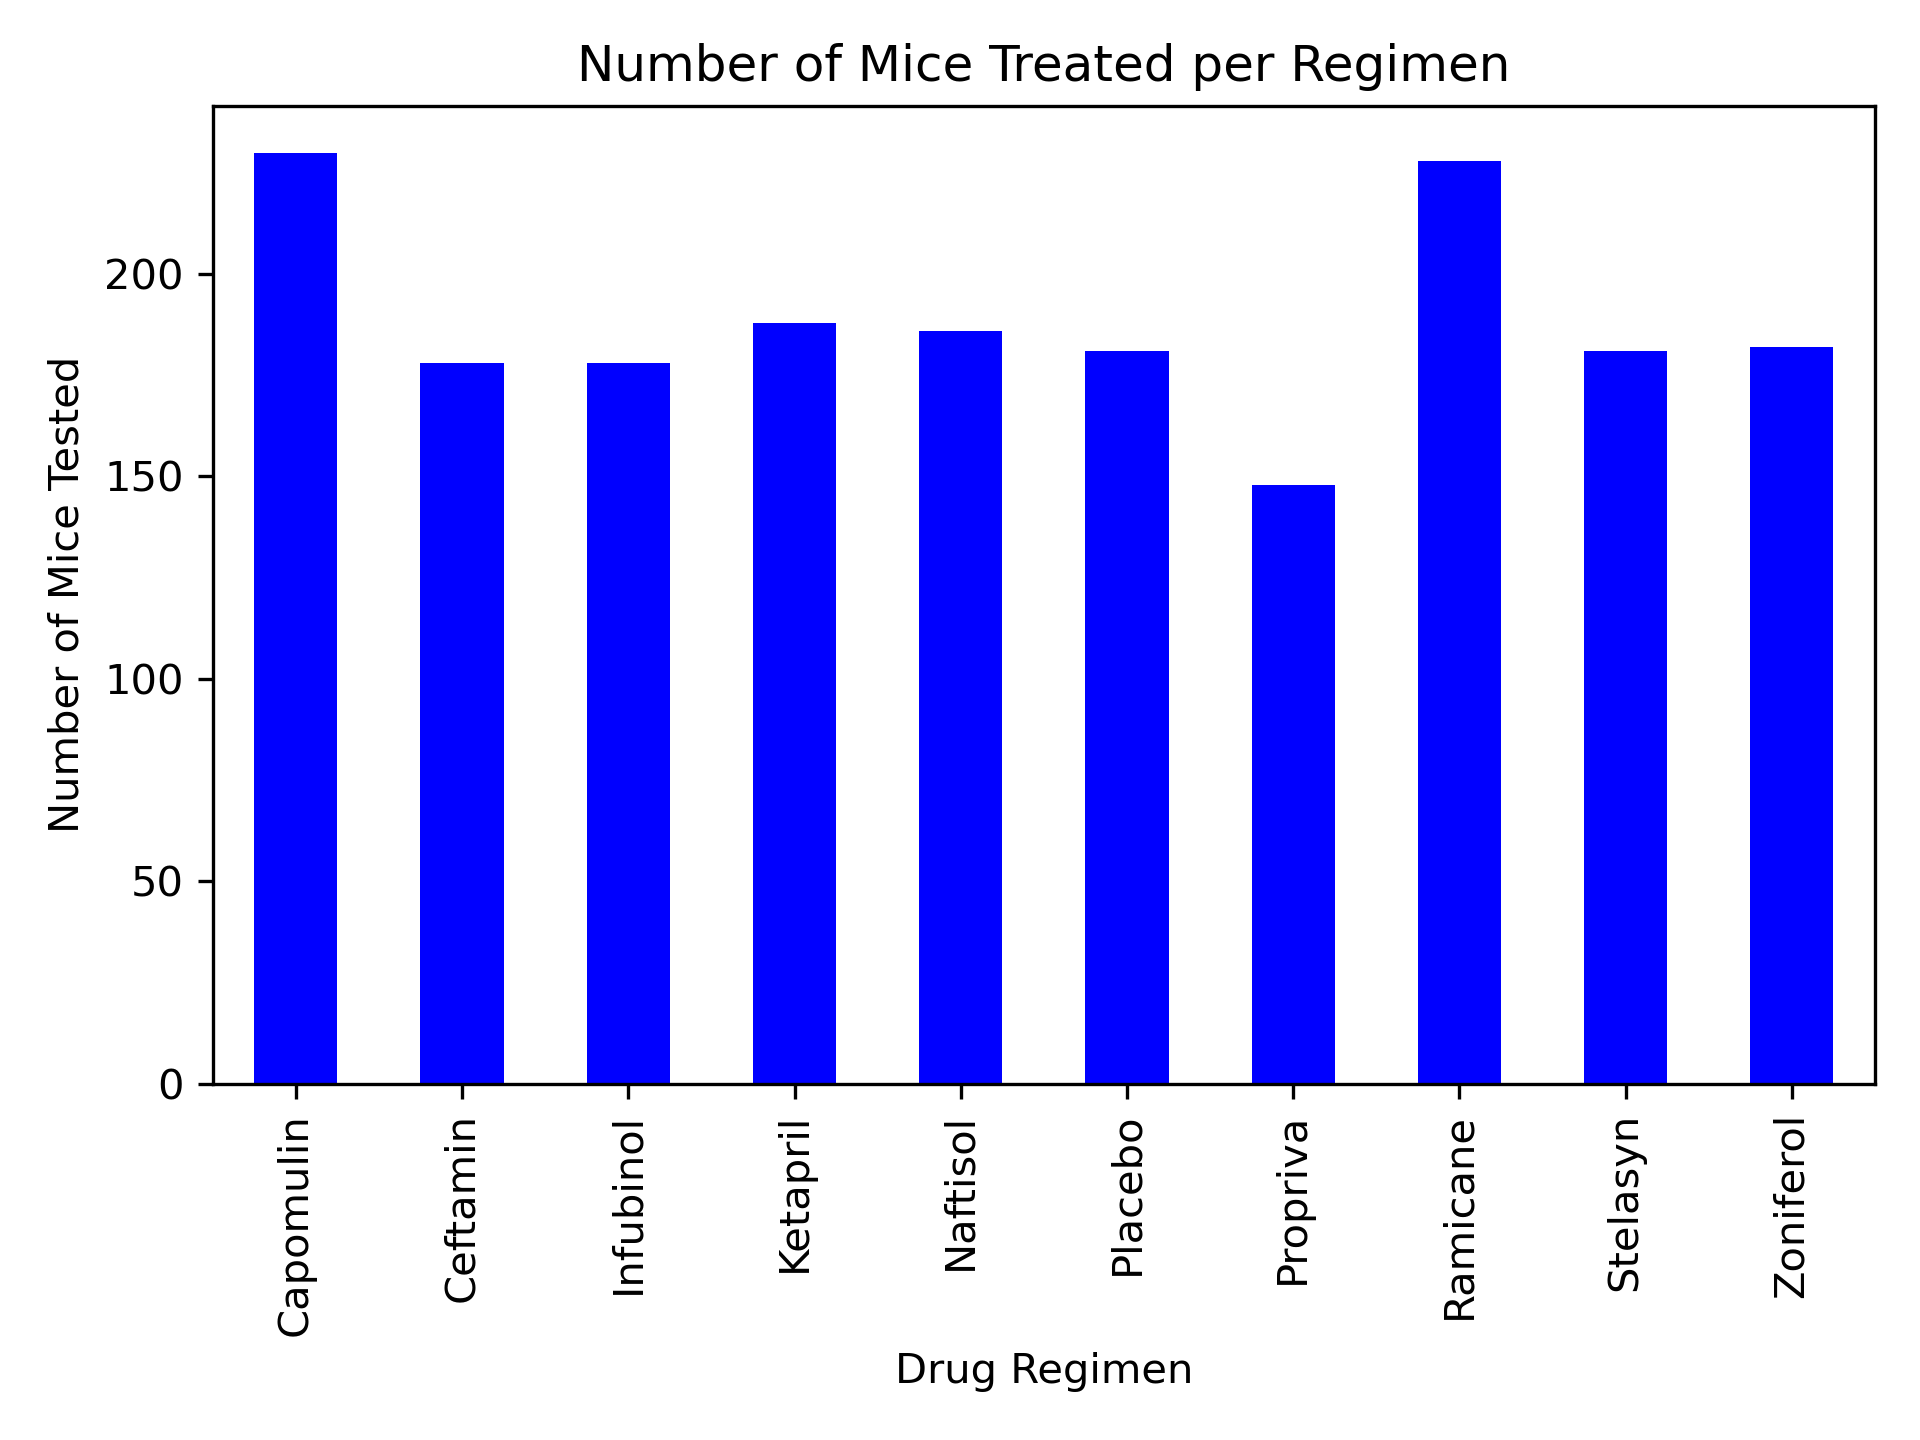

In [72]:

mice_per_regimen = mouse_study.groupby("Drug Regimen").count()["Mouse ID"]
mice_per_regimen
fig_1 = mice_per_regimen.plot(kind="bar", color="b")

# Set textual properties
plt.title("Number of Mice Treated per Regimen")
plt.ylabel("Number of Mice Tested")

plt.savefig("../Images/Pandas Bar Chart Timepoint for mice for each Regimen.png")

# Show the bar chart
plt.show()
# Resize plot to display labels
plt.tight_layout()

<IPython.core.display.Javascript object>


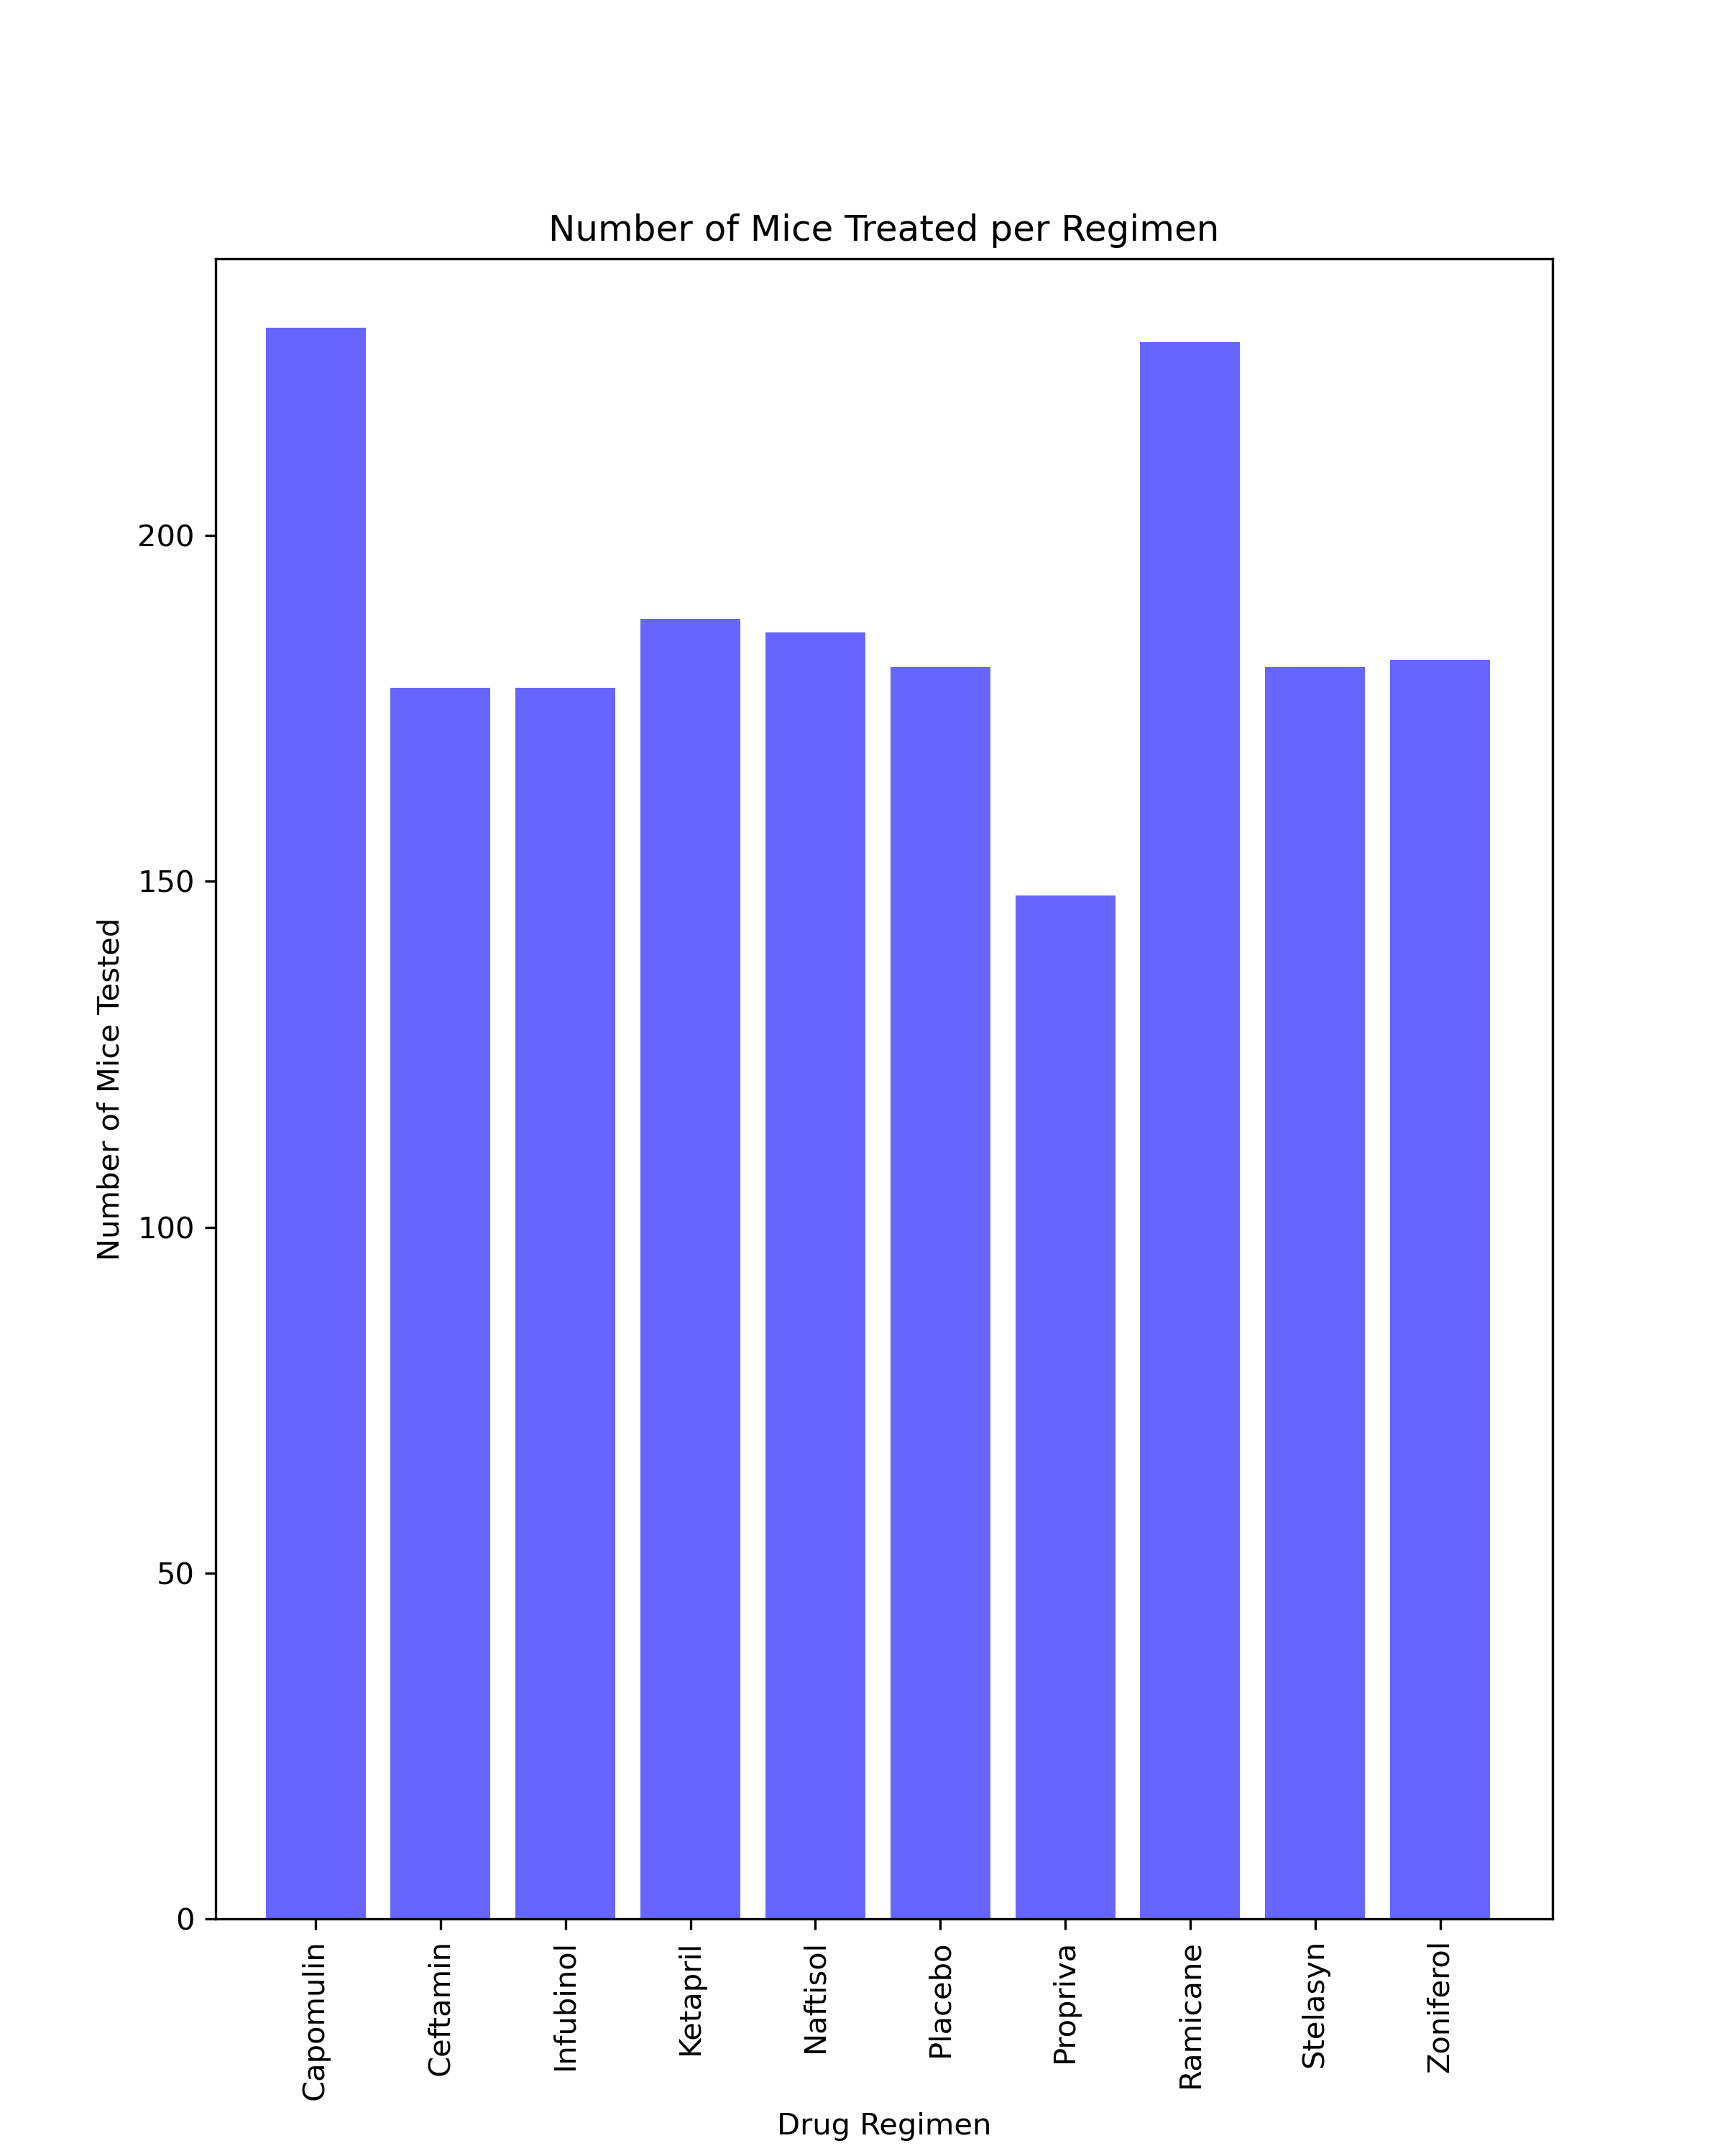

In [82]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mice_per_regimen))

regimen_in_study = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
                    'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

mice_in_study =(mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count())

fig = plt.figure(figsize = (8, 10))
fig_2 = plt.bar(x_axis, mice_in_study, color='b', alpha=0.6, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_in_study,rotation='vertical',fontsize = 10)

plt.xlim(-0.8, len(x_axis)-0.10)

plt.ylim(0, max(mice_in_study)+10)

plt.title("Number of Mice Treated per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.savefig("../Images/Pyplot Bar Chart Timepoint for mice for each Regimen.png")
plt.show()


In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


<IPython.core.display.Javascript object>


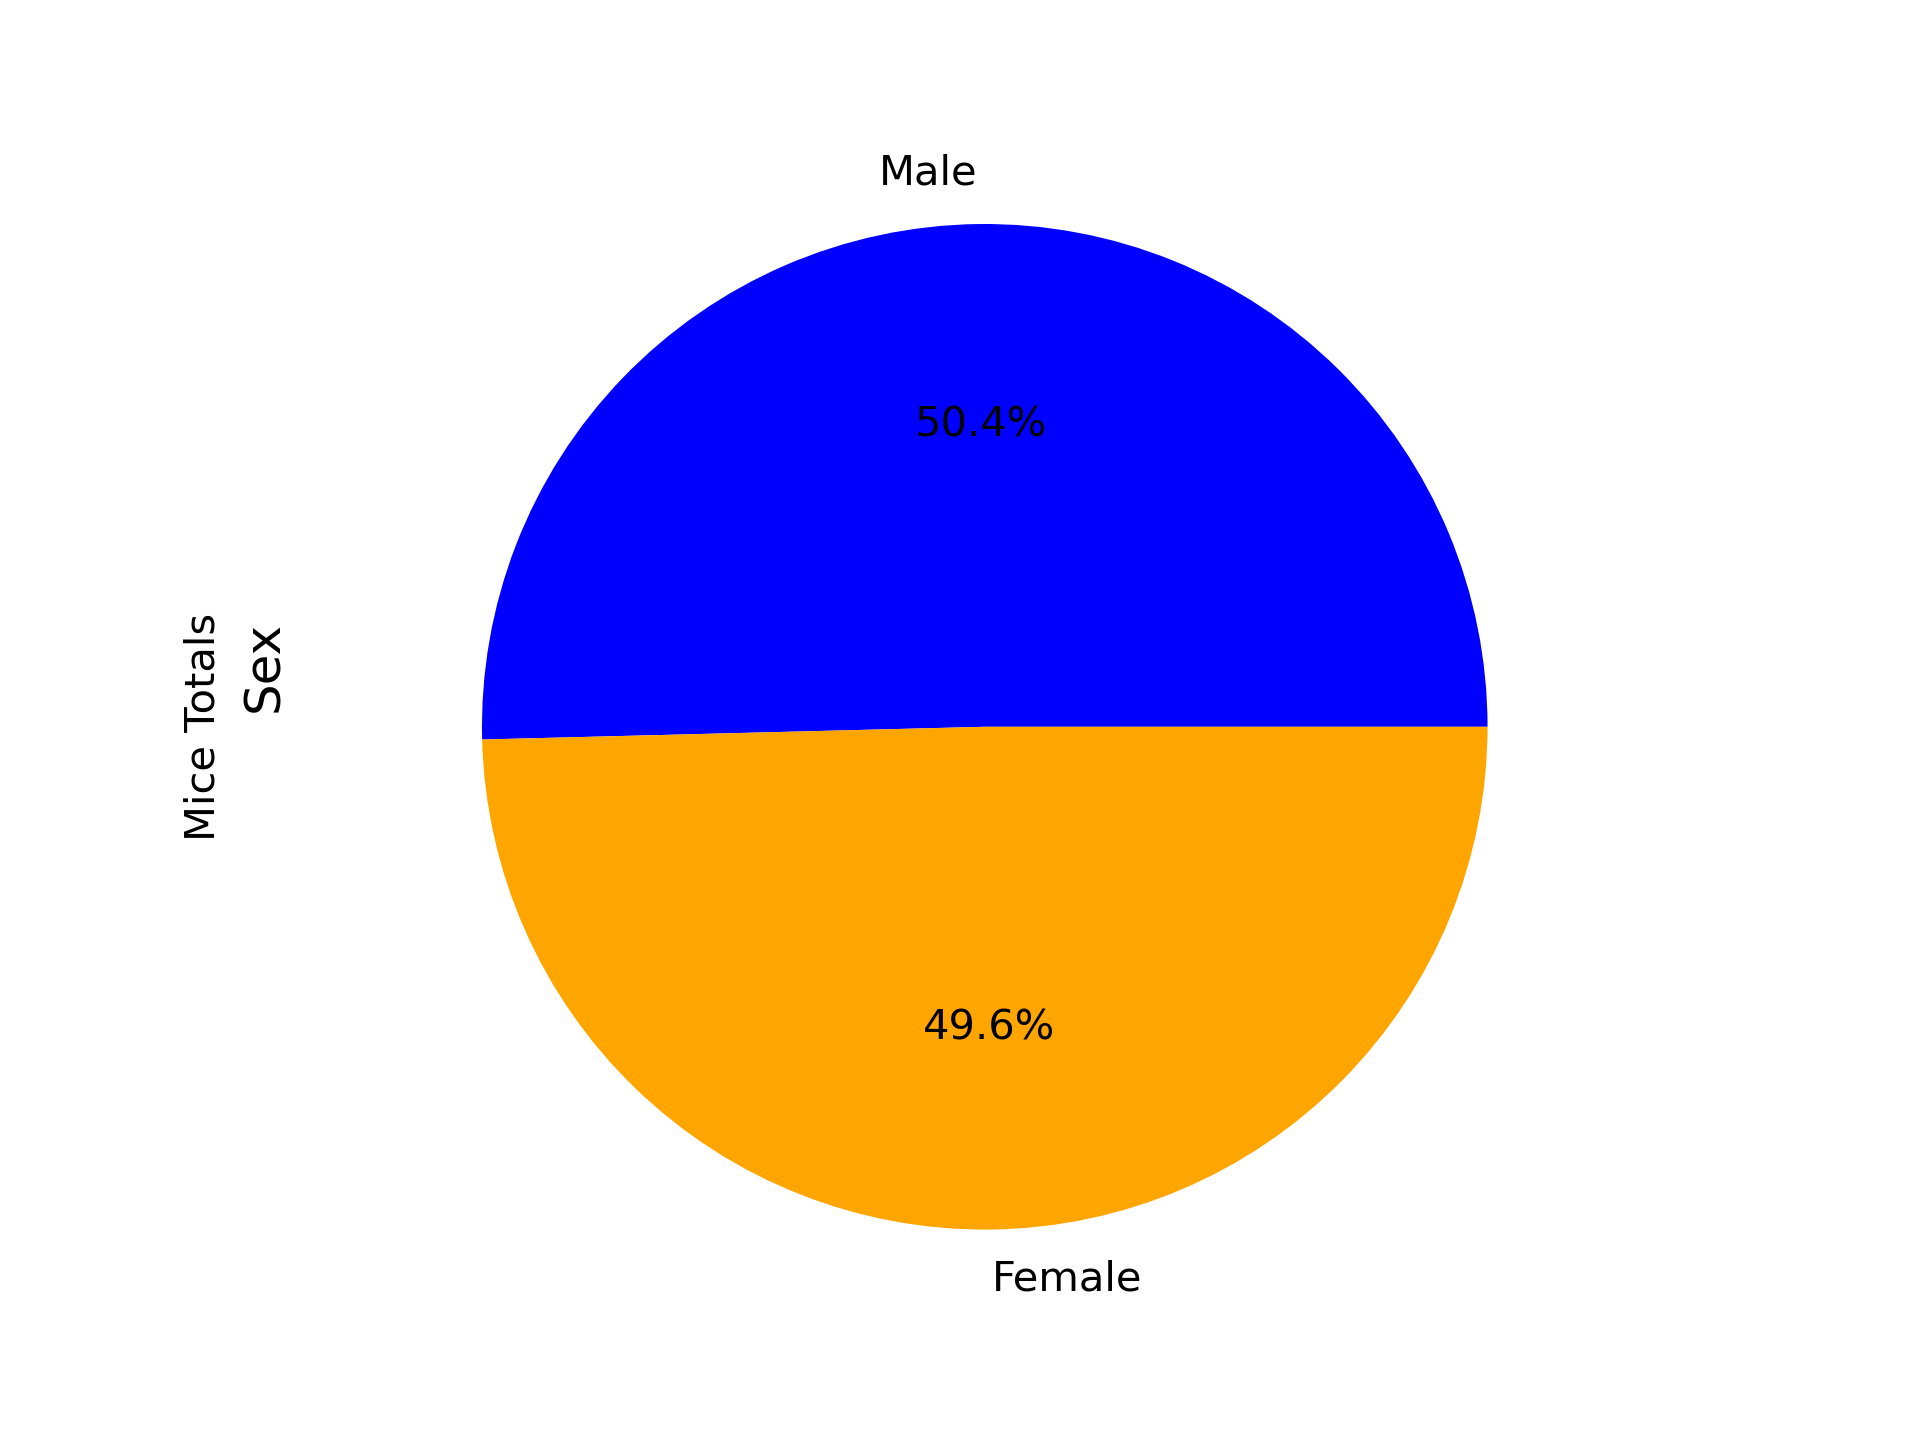

In [83]:
# Get total mice in mouse_data and subtract 1. This female mouse was not included in study.
atotal = mouse_metadata["Mouse ID"].count() -1

# Get the number of male mice. In this case 125
amale = mouse_metadata.loc[mouse_metadata["Sex"] == "Male"].count()

# The difference is the number of females. In this case 123.
afemale = atotal - amale


gender_tots = [amale, afemale]
colors = ["blue","orange"]
gender_types_pandas = ["Male","Female"]
explode = (0, 0)

# Create the DataFrame
mice_df = pd.DataFrame({"Sexes":["Male","Female"],
                        "Mice Totals":gender_tots})

# Get the first element in the list: 125 and 123.
mice_df = mice_df["Mice Totals"].str[0]

mice_df.index.name = "Sexes"

fig_3 = mice_df.plot(kind='pie', explode=explode, labels=gender_types_pandas, colors=colors, subplots=True, autopct = '%1.1f%%', startangle=360)
plt.title("Sex", rotation = -270, loc = 'left', y=0.5)
plt.axis('equal')
plt.show()

# Save the pie chart figure
plt.savefig("../Images/Pandas Pie Chart Sex distribution.png")


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

<IPython.core.display.Javascript object>


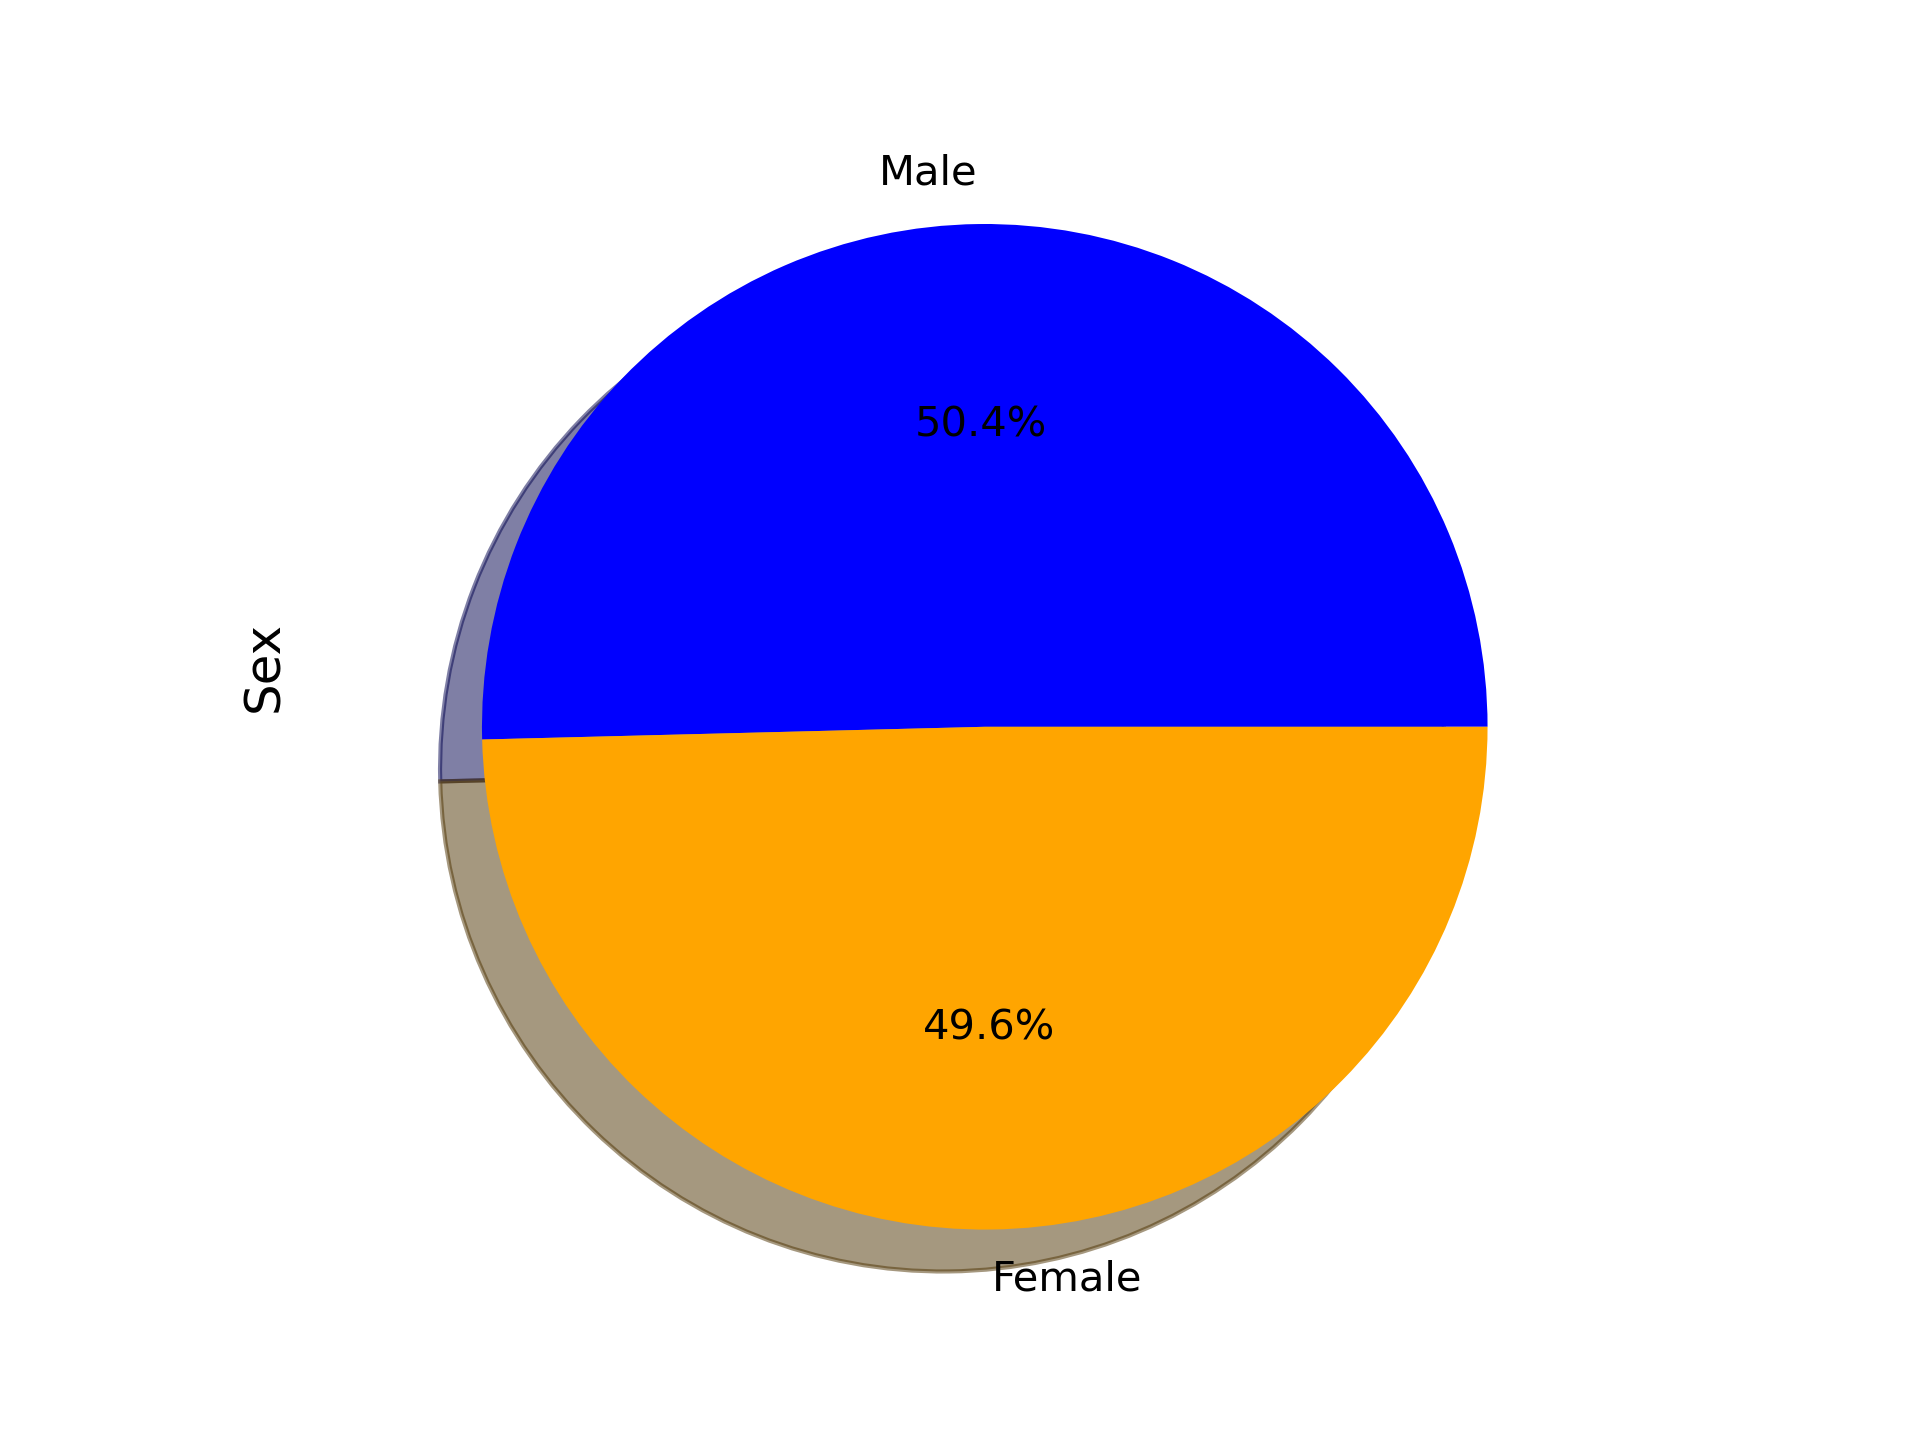

In [84]:

male_number_mice = mouse_metadata.loc[mouse_metadata["Sex"] == "Male"].count()
# The output is 125 male mice
male = male_number_mice[0] 
 

female_number_mice = mouse_metadata.loc[(mouse_metadata["Sex"] == "Female") & 
                                        (mouse_metadata["Mouse ID"] != "g989")].count()
# The output shows 123 female mice
female = female_number_mice[0]

# Expected percentages for male mice are 125/248*100
# Expected percentages for female mice is 123/248*100

# Labels for the sections of our pie chart
genders = ["Male","Female"]

# The values of each section of the pie chart
gender_numbers = [male,female]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to not to seperate the "Males" section from the "Females" section
explode = (0, 0)

fig_4 = plt.pie(gender_numbers, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Sex", rotation = -270, loc = 'left', y=0.5)
plt.axis("equal")
plt.savefig("../Images/Pyplot Pie Chart Sex distribution.png")
plt.show()
 

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [125]:
# Let's start with Capomulin
capomulin_regimen_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Capomulin",:]

# The max timepoint for each Mouse ID for Capomulin
capomulin_regimen_max_tp = capomulin_regimen_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol_tot = pd.DataFrame(capomulin_regimen_max_tp)

# Grouped dataframe to be merged. Use a left join only want to look at those max timepoints per mouse
capomulin_regimen_merged = pd.merge(capomulin_vol_tot, cleaned_mouse_study, how="left", on=("Mouse ID","Timepoint"))
# Quick look 
capomulin_regimen_merged.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

In [126]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
# for tumor volumes for Capomulin. 
capomulin_tumor_volume = capomulin_regimen_merged["Tumor Volume (mm3)"]

# Let us derive and print out all pertinent data as it may be 
# needed later analysis.
quartiles = capomulin_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers for Capomulin.")
print(f"Values above {upper_bound} could be outliers for Capomulin.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.


In [127]:
# Next up Ramicane just repeat what was previously done
ramicane_regimen_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Ramicane",:]

# The max timepoint for each Mouse ID for Ramicane in
ramicane_regimen_max_tp = ramicane_regimen_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol_tot = pd.DataFrame(ramicane_regimen_max_tp)

# Grouped dataframe to be merged. Use a left join only want to look at those max timepoints per mouse
ramicane_regimen_merged = pd.merge(ramicane_vol_tot, cleaned_mouse_study, how="left", on=("Mouse ID","Timepoint"))
# Quick look 
ramicane_regimen_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [128]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
# for tumor volumes for Ramicane. 
ramicane_tumor_volume = ramicane_regimen_merged["Tumor Volume (mm3)"]

# Let us derive and print out all pertinent data as it may be 
# needed later analysis.
quartiles = ramicane_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers for Ramicane.")
print(f"Values above {upper_bound} could be outliers for Ramicane.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.


In [129]:
# Next up Infubinol just repeat what was previously done
infubinol_regimen_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Infubinol",:]

# The max timepoint for each Mouse ID for Infubinol in
infubinol_regimen_max_tp = infubinol_regimen_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol_tot = pd.DataFrame(infubinol_regimen_max_tp)

# Grouped dataframe to be merged. Use a left join only want to look at those max timepoints per mouse
infubinol_regimen_merged = pd.merge(infubinol_vol_tot, cleaned_mouse_study, how="left", on=("Mouse ID","Timepoint"))
# Quick look 
infubinol_regimen_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [130]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
# for tumor volumes for Infubinol. 
infubinol_tumor_volume = infubinol_regimen_merged["Tumor Volume (mm3)"]

# Let us derive and print out all pertinent data as it may be 
# needed later analysis.
quartiles = infubinol_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers for Infubinol.")
print(f"Values above {upper_bound} could be outliers for Infubinol.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.


In [131]:
# Next up Ceftamin just repeat what was previously done
ceftamin_regimen_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Infubinol",:]

# The max timepoint for each Mouse ID for Ceftamin in
ceftamin_regimen_max_tp = ceftamin_regimen_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol_tot = pd.DataFrame(ceftamin_regimen_max_tp)

# Grouped dataframe to be merged. Use a left join only want to look at those max timepoints per mouse
ceftamin_regimen_merged = pd.merge(ceftamin_vol_tot, cleaned_mouse_study, how="left", on=("Mouse ID","Timepoint"))
# Quick look 
ceftamin_regimen_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [132]:
# Calculate the IQR and quantitatively determine if there are any potential outliers
# for tumor volumes for Ceftamin. 
ceftamin_tumor_volume = ceftamin_regimen_merged.head()["Tumor Volume (mm3)"]

# Let us derive and print out all pertinent data as it may be 
# needed later analysis.
quartiles = ceftamin_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers for Ceftamin.")
print(f"Values above {upper_bound} could be outliers for Ceftamin.")

The lower quartile of Ceftamin tumors: 65.52574285
The upper quartile of Ceftamin tumors: 67.97341878
The interquartile range of Ceftamin tumors: 2.4476759300000026
The median of Ceftamin tumors: 66.08306589 
Values below 61.854228954999996 could be outliers for Ceftamin.
Values above 71.644932675 could be outliers for Ceftamin.


In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
